### Loading libraries

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [3]:
df = pd.read_csv('./StudentsPerformance.csv')
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


### Missing values

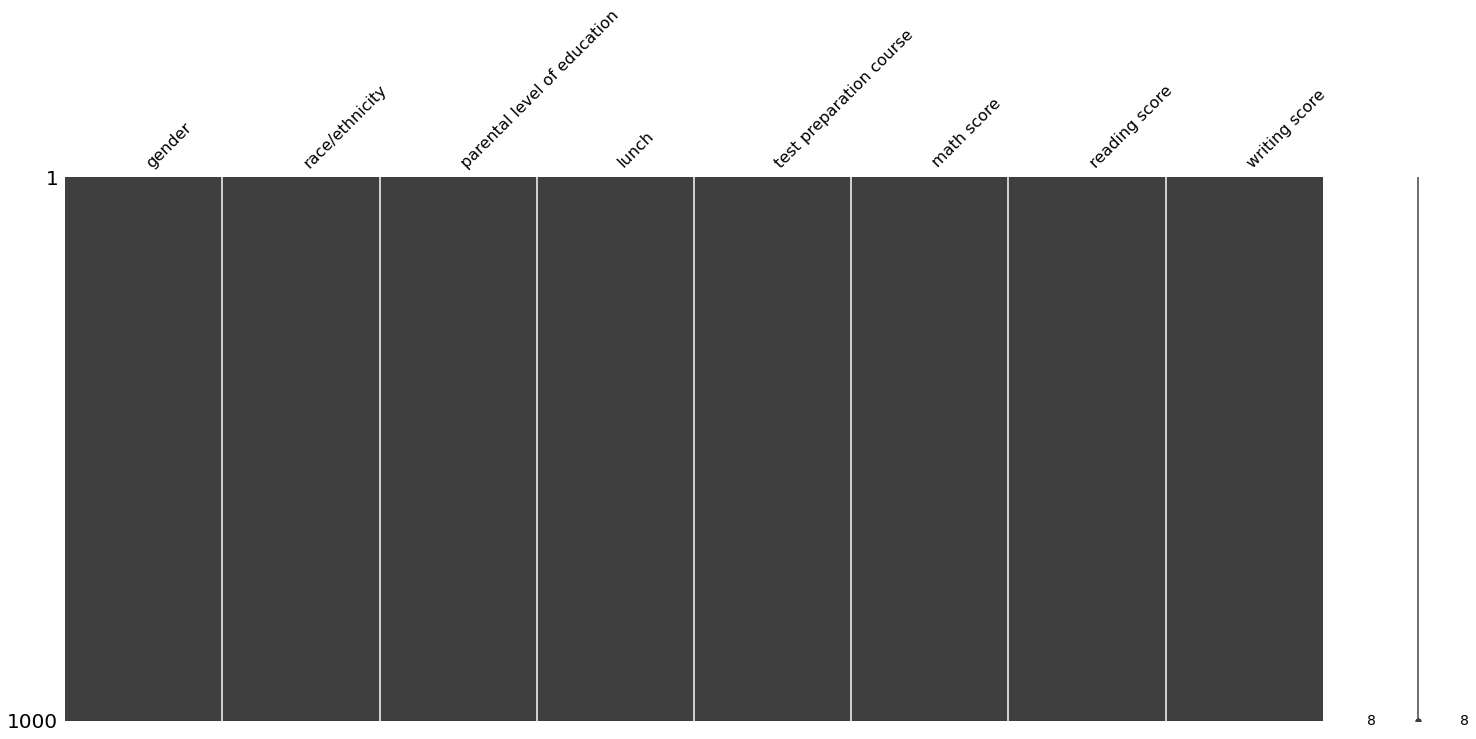

In [5]:
msno.matrix(df);

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Data preparation

In [7]:
#Initializing passing marks as 35
passmark = 35

In [10]:
#Creating new columns
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

### Grading system

In [12]:
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df['grade'] = df.apply(lambda x : Grade(x["Percentage"]), axis = 1)   

In [13]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,E


### Data visualization

In [14]:
sns.set(style='whitegrid')

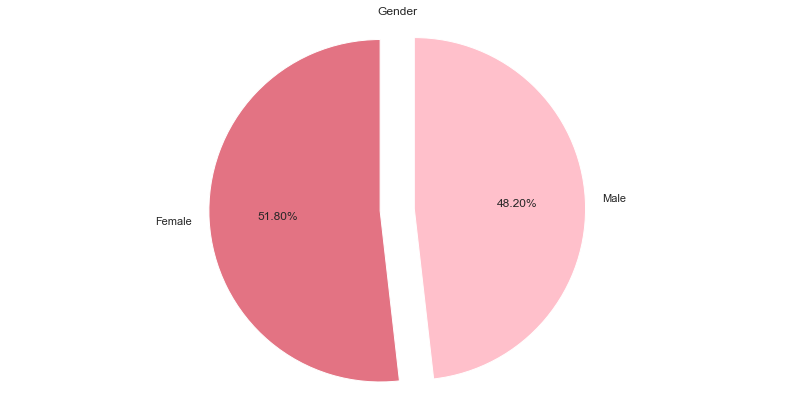

In [15]:
plt.figure(figsize=(14,7))
labels = ['Female', 'Male']
plt.pie(df['gender'].value_counts(), labels = labels, explode=[0.1, 0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

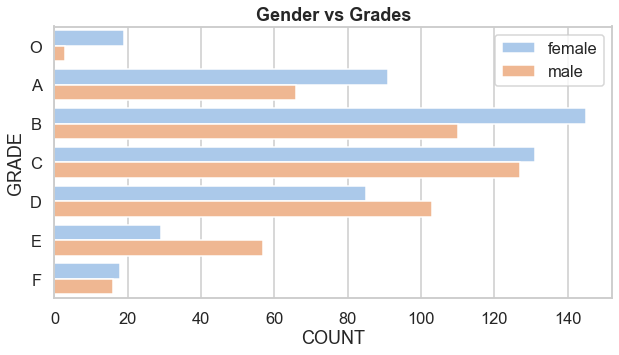

In [20]:
plt.figure(figsize=(10,5))
sns.set_context("talk", font_scale = 1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right', frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

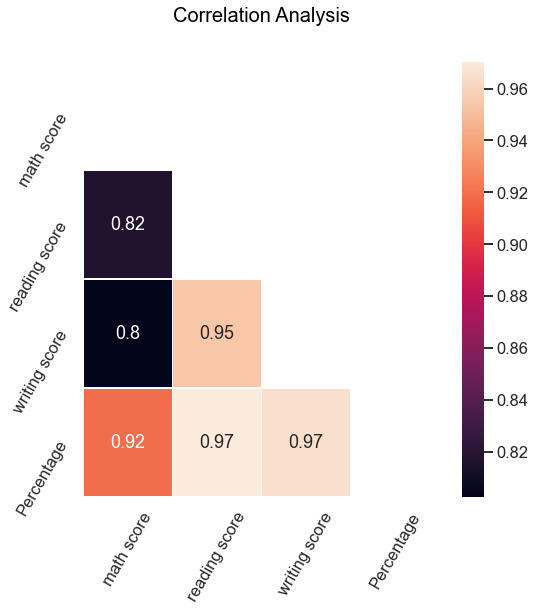

In [24]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Black',fontsize=20,pad=40)

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

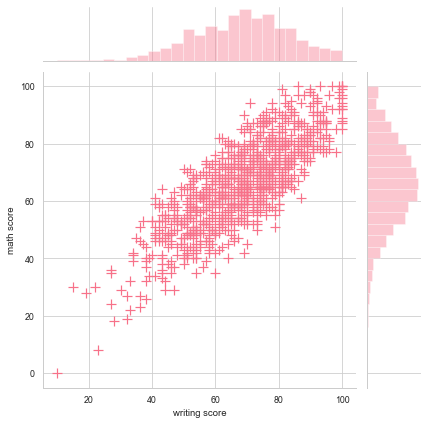

In [31]:
sns.set_palette("husl", 9)
sns.jointplot(
    data=df, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25),
)
